In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as go
import os

# Question 1 


- nombre d'observations = 499
- période = 1983 to 2025
- 7 parametres non conserver

In [2]:
df_ch4 = pd.read_csv('ch4_mm_gl.csv',header=45)
display(df_ch4)
print(df_ch4.columns)

,year,month,decimal,average,average_unc,trend,trend_unc
0,1983,7,1983.542,1625.96,2.19,1635.15,1.42
1,1983,8,1983.625,1628.05,2.72,1635.64,1.36
2,1983,9,1983.708,1638.42,2.16,1636.19,1.29
3,1983,10,1983.792,1644.81,1.40,1636.81,1.21
4,1983,11,1983.875,1642.60,0.71,1637.49,1.12
...,...,...,...,...,...,...,...
494,2024,9,2024.708,1935.67,-9.99,1931.99,-9.99
495,2024,10,2024.792,1941.58,-9.99,1932.75,-9.99
496,2024,11,2024.875,1940.44,-9.99,1933.49,-9.99
497,2024,12,2024.958,1937.52,-9.99,1934.23,-9.99


Index(['year', 'month', 'decimal', 'average', 'average_unc', 'trend',
       'trend_unc'],
      dtype='object')


# Question 2

In [3]:
df_ch4 = df_ch4[['month', 'average']]
display(df_ch4)



,month,average
0,7,1625.96
1,8,1628.05
2,9,1638.42
3,10,1644.81
4,11,1642.60
...,...,...
494,9,1935.67
495,10,1941.58
496,11,1940.44
497,12,1937.52


# Question 3

# Question 4

V1 :

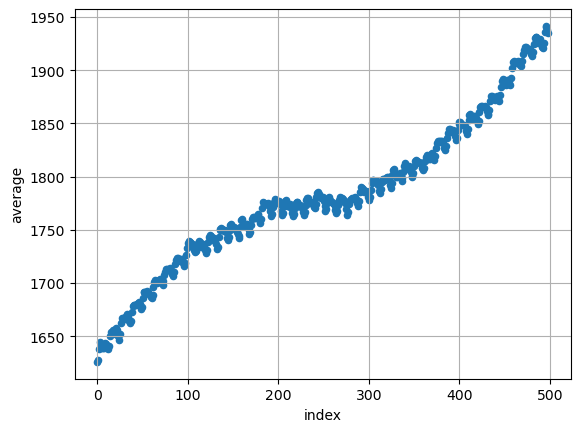

In [4]:

df_ch4.reset_index().plot.scatter(x='index',y='average')
plt.grid(True)

V2 :

In [5]:
def scatterplot_graphique(dataframe,message):
    f = sns.scatterplot(data=dataframe.reset_index(), x="index", y="average", hue="month",legend="full")
    plt.grid(True)
    plt.title(message)

je prefère la version 2...

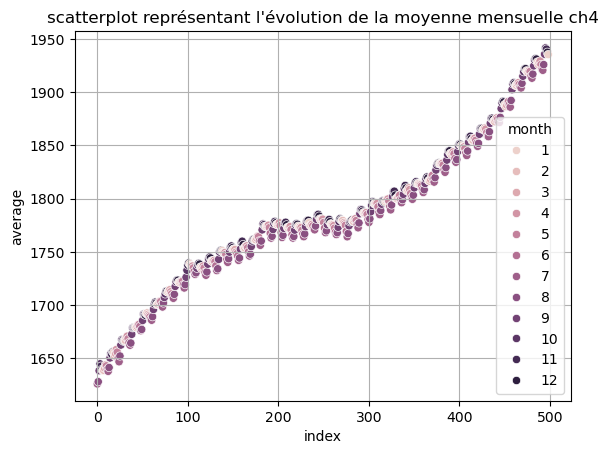

In [6]:
scatterplot_graphique(df_ch4,"scatterplot représentant l'évolution de la moyenne mensuelle ch4")

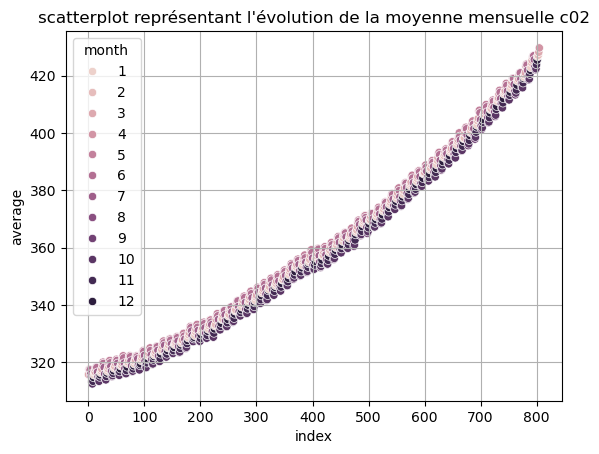

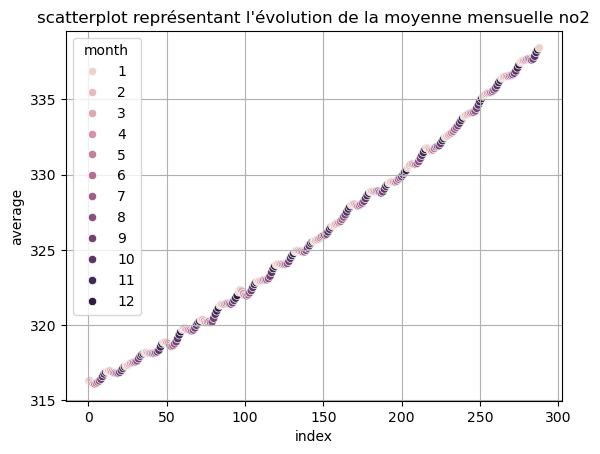

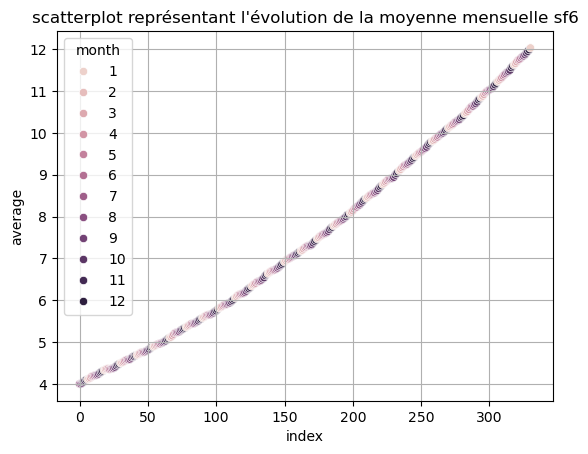

In [7]:
df_co2 = pd.read_csv('co2_mm_mlo.csv',header=40)
df_co2 = df_co2[['month', 'average']]
plt.figure()
scatterplot_graphique(df_co2,"scatterplot représentant l'évolution de la moyenne mensuelle c02")

df_n2o = pd.read_csv('n2o_mm_gl.csv',header=45)
df_n2o = df_n2o[['month', 'average']]
plt.figure()
scatterplot_graphique(df_n2o,"scatterplot représentant l'évolution de la moyenne mensuelle no2")

df_sf6 = pd.read_csv('sf6_mm_gl.csv',header=45)
df_sf6 = df_sf6[['month', 'average']]
plt.figure()
scatterplot_graphique(df_sf6,"scatterplot représentant l'évolution de la moyenne mensuelle sf6")



ch4 et no2 semble avoir des variations saisoniere du a l'epaisseur de la courbe.

# Question 5

### FONCTIONS

In [8]:
def moyenne_mobile_ordre_6(dataframe):
    window_size = 6
    smoothed_values = []
    smoothed_months = []

    for t in range(window_size, len(dataframe) - window_size):
        window = dataframe['average'].iloc[t - window_size : t + window_size + 1].values

        weighted_sum = 0.5 * window[0] + sum(window[1:-1]) + 0.5 * window[-1]
        smoothed_value = weighted_sum / 12

        smoothed_months.append(dataframe['month'].iloc[t])
        smoothed_values.append(smoothed_value)

    df_smoothed = pd.DataFrame({'month': smoothed_months, 'average_smoothed' : smoothed_values})
    return df_smoothed


In [9]:
def affichage_moyenne_mobile_ordre_6(dataframe,smoothed_dataframe,y_label): 
    sns.lineplot(data=dataframe.reset_index(), x="index", y="average", label="Original")
    sns.lineplot(data=smoothed_dataframe.reset_index(), x="index", y="average_smoothed", label="Moyenne Mobile (ordre 6)")
    plt.grid(True)
    plt.title("Lissage par moyenne mobile centrée (ordre 6)")
    plt.xlabel("index")
    plt.ylabel(y_label + " moyen")
    plt.legend()
    plt.show()

In [10]:
def serie_residuelle_vector(dataframe,smoothed_dataframe,offset):
    x_t = dataframe['average'].iloc[offset : -offset].to_numpy()
    x_t_smoothed = smoothed_dataframe['average_smoothed'].to_numpy()
    S_t = x_t - x_t_smoothed
    months = dataframe['month'].iloc[offset : -offset].to_numpy()
    df_residuelle = pd.DataFrame({'month' : months, 'residual' : S_t})
    return df_residuelle



In [11]:
def affichage_serie_residuelle(dataframe_residuelle,y_label):
    sns.lineplot(data=dataframe_residuelle.reset_index(),x="index",y="residual",label="residuelle")
    plt.grid(True)
    plt.title("Serie residuelle")
    plt.xlabel("index")
    plt.ylabel(y_label + " residuelle")
    plt.legend()
    plt.show()



In [12]:
def coefficients_mensuels(dataframe, dataframe_residuelle, offset):
    months = dataframe['month'].iloc[offset : -offset].to_numpy()  
    dataframe_residuelle['month'] = months
    coefficients = dataframe_residuelle.groupby('month')['residual'].mean().sort_index()
    return coefficients



In [13]:
def affichage_coefficients_mensuels(serie_coefficient,y_label):
    dataframe_coefficient = serie_coefficient.reset_index()
    dataframe_coefficient.columns = ['month','coefficient']
    dataframe_coefficient['month'] = pd.to_numeric(dataframe_coefficient['month'], errors='coerce')
    sns.barplot(data=dataframe_coefficient,x="month",y="coefficient")
    plt.grid(True)
    plt.title("coefficients mensuels")
    plt.xlabel("month")
    plt.ylabel(y_label + " coefficients mensuels")
    plt.xticks(ticks=range(0, 12), labels=['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
    plt.show()


In [14]:
def centrer_coefficient_mensuels(serie_coefficients_mensuels):
    moyenne = serie_coefficients_mensuels.mean()
    coefficients_centrer = serie_coefficients_mensuels - moyenne
    return coefficients_centrer


In [15]:
def affichage_centrer_coefficient_mensuels(serie_coefficients_mensuels,y_label):
    dataframe_coefficient_mensuels = serie_coefficients_mensuels.reset_index()
    dataframe_coefficient_mensuels.columns = ['month','coefficient']
    dataframe_coefficient_mensuels['month'] = pd.to_numeric(dataframe_coefficient_mensuels['month'], errors='coerce')
    sns.barplot(data=dataframe_coefficient_mensuels,x="month",y="coefficient")
    plt.grid(True)
    plt.title("coefficients mensuels centrer")
    plt.xlabel("month")
    plt.ylabel(y_label + " coefficients mensuels centrer")
    plt.xticks(ticks=range(0, 12), labels=['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
    plt.show()

In [16]:
def correction_variation_saisoniere(dataframe, serie_coefficient_mensuel):
    dataframe_copy = dataframe.copy()
    dataframe_copy['coefficient'] = dataframe_copy['month'].map(serie_coefficient_mensuel)
    dataframe_copy['corrigee'] = dataframe_copy['average'] - dataframe_copy['coefficient']
    return dataframe_copy

In [17]:
def afficher_correction_variation_saisoniere(dataframe, y_label):
    sns.lineplot(data=dataframe.reset_index(), x="index", y="average", label="Original")
    sns.lineplot(data=dataframe.reset_index(), x="index", y="corrigee", label="Corrigee")
    plt.grid(True)
    plt.title("Correction des variations saisonnières")
    plt.xlabel("Index temporel")
    plt.ylabel(y_label + " moyen")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [18]:
def regression_corrige_moindres_carres(dataframe):
    dataframe = dataframe.reset_index(drop=True)
    x = dataframe.index.to_numpy()
    y = dataframe["corrigee"].to_numpy()
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    covariance_xy = np.sum((x - x_mean) * (y - y_mean))
    variance_x = np.sum((x - x_mean) ** 2)
    a = covariance_xy / variance_x
    b = y_mean - a * x_mean
    y_pred = a * x + b
    return x,y,y_pred,a,b


In [19]:
def affichage_regression_corrige_moindres_carres(x,y,y_pred,a,b,y_label):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=x, y=y, label="Série corrigee", color="blue", s=30)
    plt.plot(x, y_pred, label=f"Tendance : y = {a:.2f}x + {b:.2f}", color="red")

    plt.title("Tendance linéaire de la série corrigee des variations saisonnieres")
    plt.xlabel("Index")
    plt.ylabel(f"{y_label} corrige")
    plt.grid(True)
    plt.legend()
    plt.show()

In [20]:
def prevision(a, b, coeficient_mensuels, dataframe, nb_mois):
    previsions = []
    x_last = len(dataframe) - 1
    for i in range(1, nb_mois + 1):
        mois_futur = (x_last + i) % 12 or 12
        t = x_last + i
        tendance = a * t + b
        saison = coeficient_mensuels[mois_futur]
        prevision = tendance + saison
        previsions.append((t, mois_futur, prevision))
    return previsions


In [21]:
def affichage_prevision(previsions):
    df_prev = pd.DataFrame(previsions, columns=["Index", "Mois", "Prévision"])
    plt.figure(figsize=(12, 6))
    plt.plot(df_prev["Index"], df_prev["Prévision"], marker='o', label="Prévision")
    plt.title("Prévision mensuelle (tendance + saison)")
    plt.xlabel("Temps (mois)")
    plt.ylabel("Valeur prévue")
    plt.grid(True)
    plt.legend()
    plt.show()

### CH4

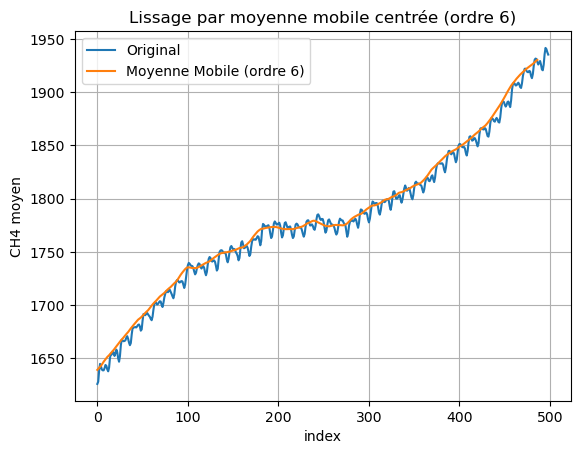

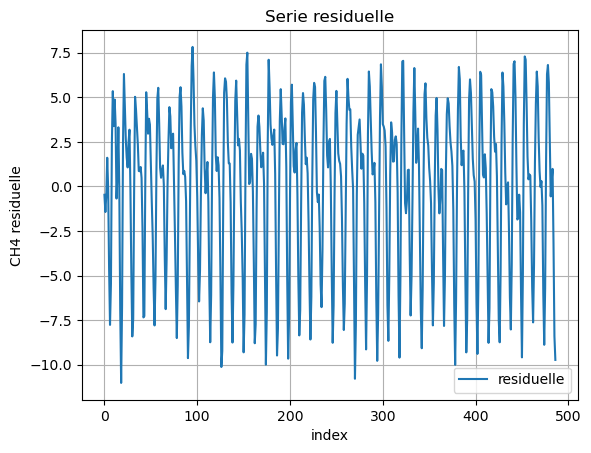

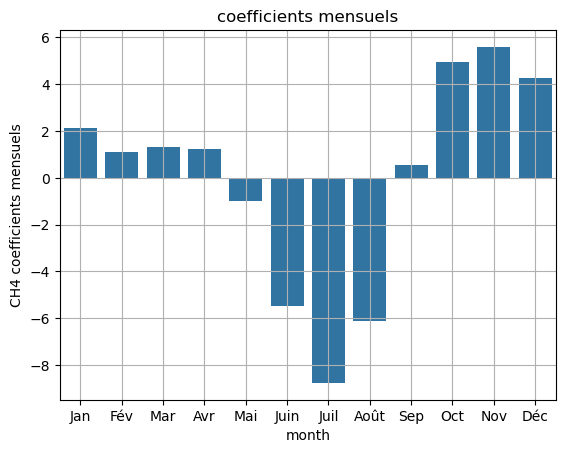

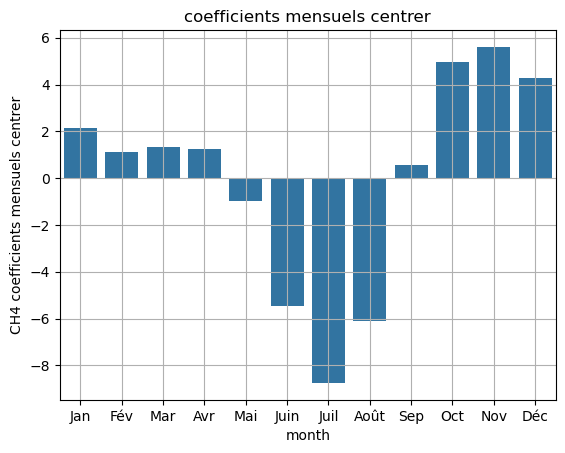

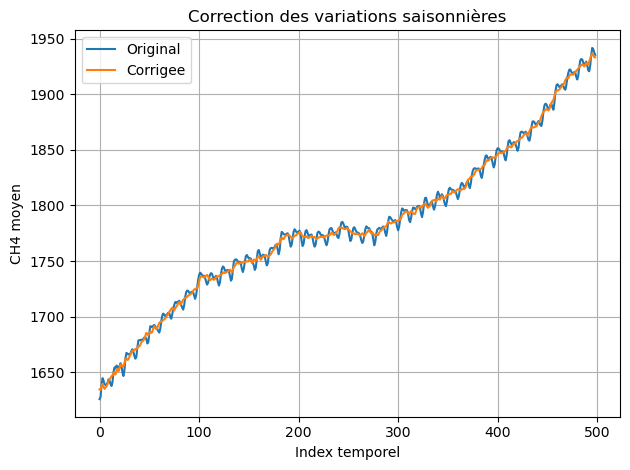

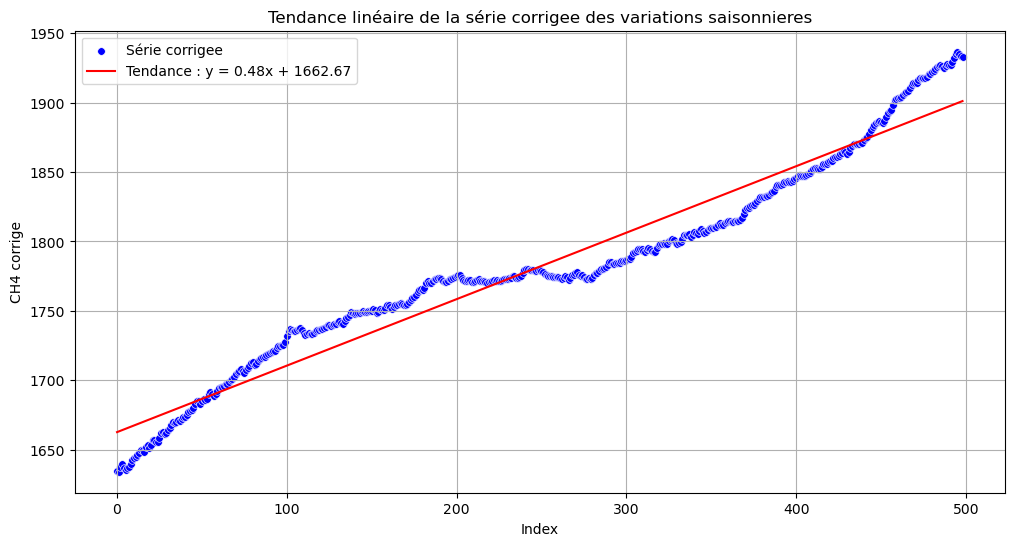

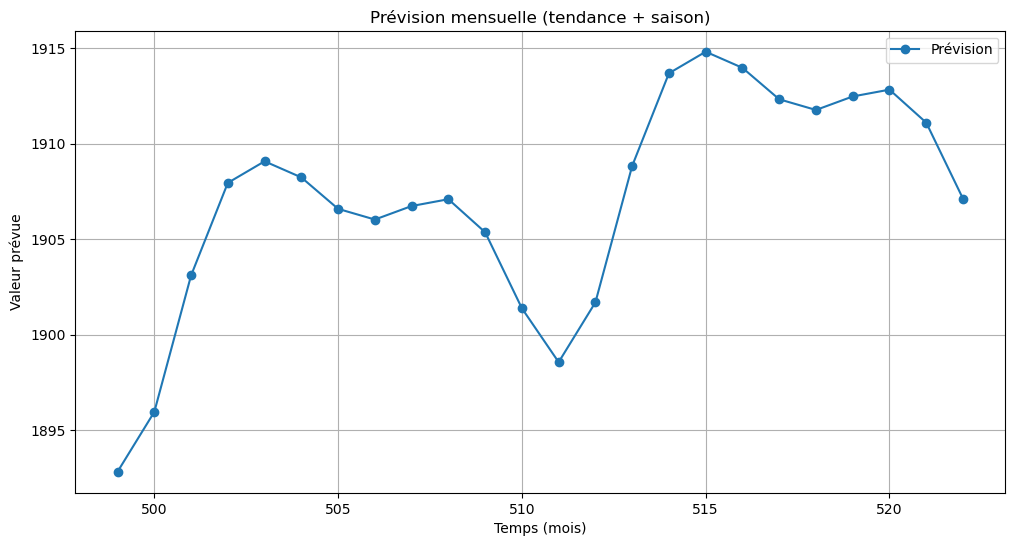

In [22]:
df_smoothed_ch4 = moyenne_mobile_ordre_6(df_ch4)
affichage_moyenne_mobile_ordre_6(df_ch4,df_smoothed_ch4,"CH4")

df_residual_ch4 = serie_residuelle_vector(df_ch4,df_smoothed_ch4,6)
affichage_serie_residuelle(df_residual_ch4,"CH4")

coefficients_mensuels_ch4 = coefficients_mensuels(df_ch4, df_residual_ch4, 6)
affichage_coefficients_mensuels(coefficients_mensuels_ch4,"CH4")

centrer_coefficient_mensuels_ch4 = centrer_coefficient_mensuels(coefficients_mensuels_ch4)
affichage_centrer_coefficient_mensuels(centrer_coefficient_mensuels_ch4,"CH4")

correction_ch4 = correction_variation_saisoniere(df_ch4,centrer_coefficient_mensuels_ch4)
afficher_correction_variation_saisoniere(correction_ch4,"CH4")

x , y , y_pred , a , b = regression_corrige_moindres_carres(correction_ch4)
affichage_regression_corrige_moindres_carres(x,y,y_pred,a,b,"CH4")

prevision_ch4 = prevision(a,b,centrer_coefficient_mensuels_ch4,df_ch4,24)
affichage_prevision(prevision_ch4)






### SF6

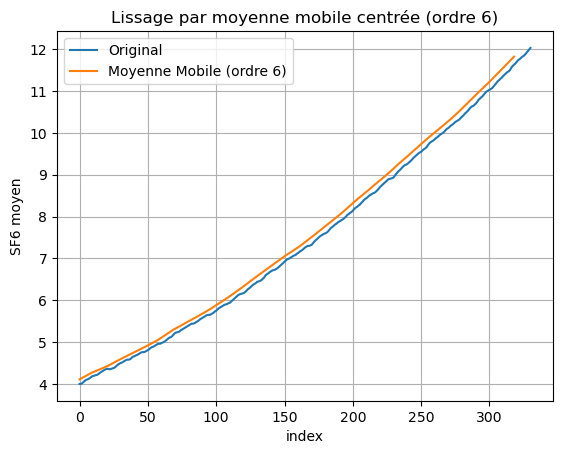

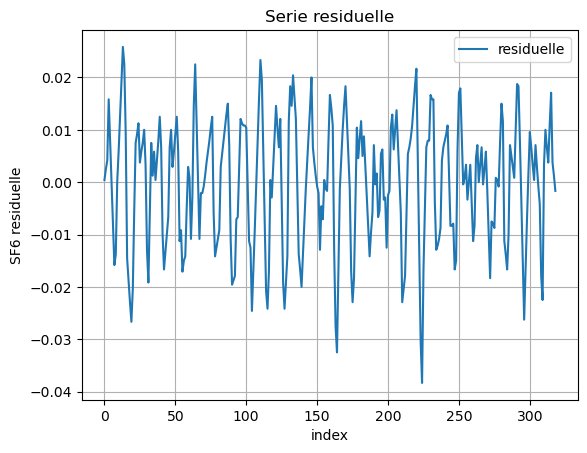

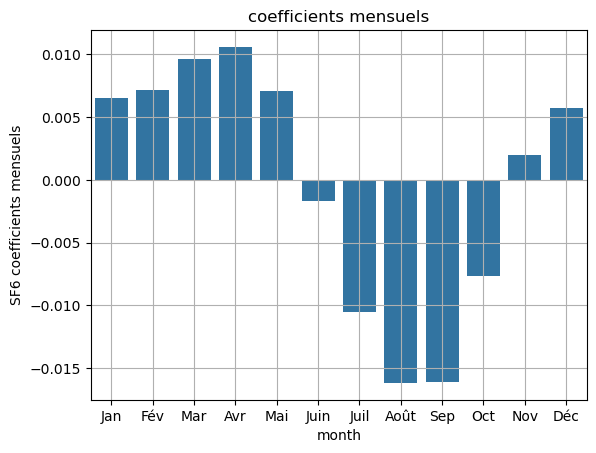

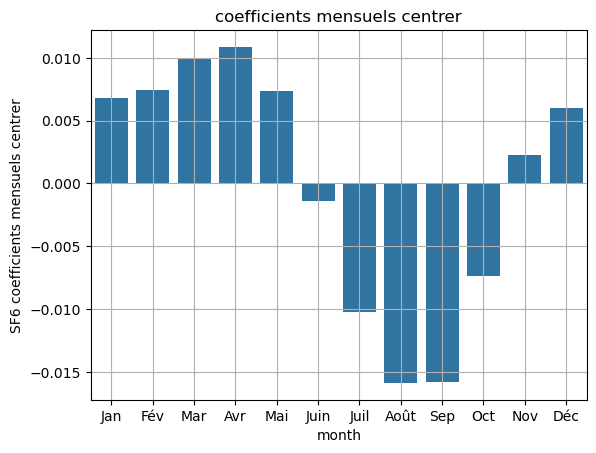

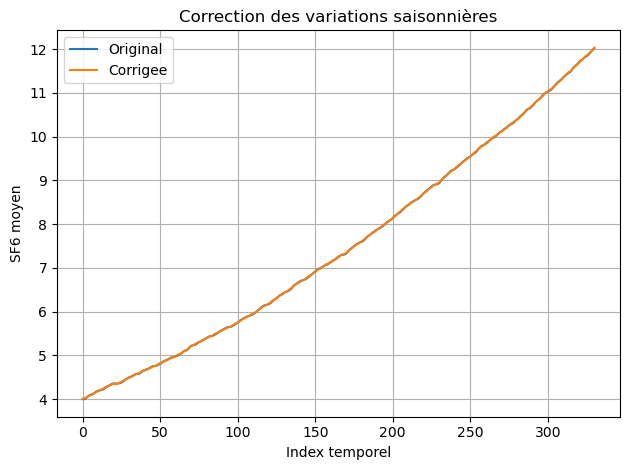

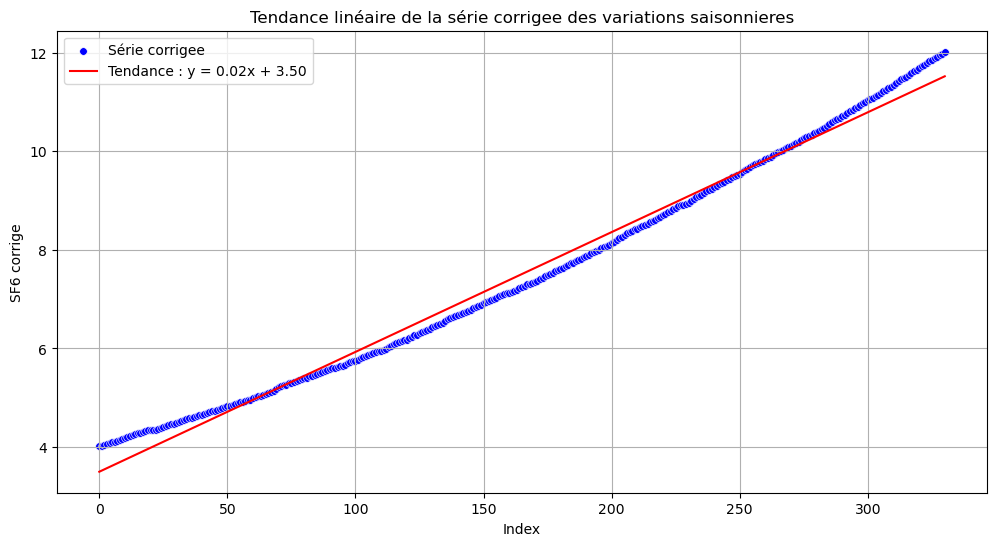

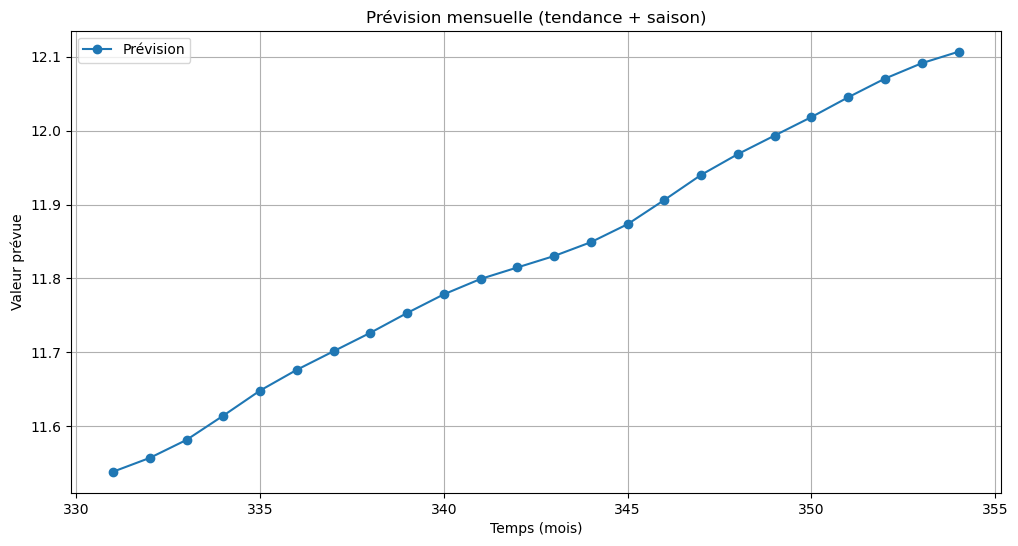

In [23]:
df_smoothed_sf6 = moyenne_mobile_ordre_6(df_sf6)
affichage_moyenne_mobile_ordre_6(df_sf6,df_smoothed_sf6,"SF6")

df_residual_sf6 = serie_residuelle_vector(df_sf6,df_smoothed_sf6,6)
affichage_serie_residuelle(df_residual_sf6,"SF6")

coefficients_mensuels_sf6 = coefficients_mensuels(df_sf6, df_residual_sf6, 6)
affichage_coefficients_mensuels(coefficients_mensuels_sf6,"SF6")

centrer_coefficient_mensuels_sf6 = centrer_coefficient_mensuels(coefficients_mensuels_sf6)
affichage_centrer_coefficient_mensuels(centrer_coefficient_mensuels_sf6,"SF6")

correction_sf6 = correction_variation_saisoniere(df_sf6,centrer_coefficient_mensuels_sf6)
afficher_correction_variation_saisoniere(correction_sf6,"SF6")

x , y , y_pred , a , b = regression_corrige_moindres_carres(correction_sf6)
affichage_regression_corrige_moindres_carres(x,y,y_pred,a,b,"SF6")

prevision_sf6 = prevision(a,b,centrer_coefficient_mensuels_sf6,df_sf6,24)
affichage_prevision(prevision_sf6)

### N2O

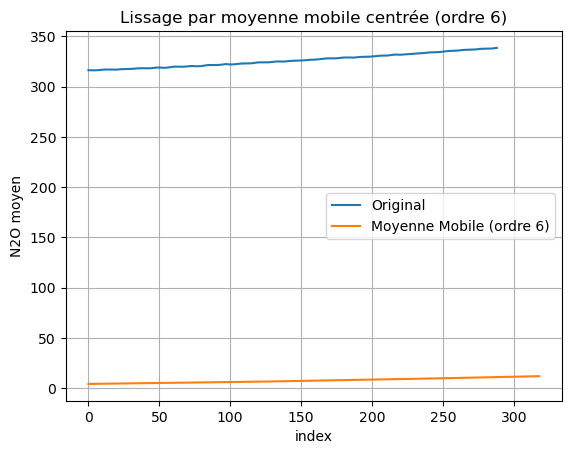

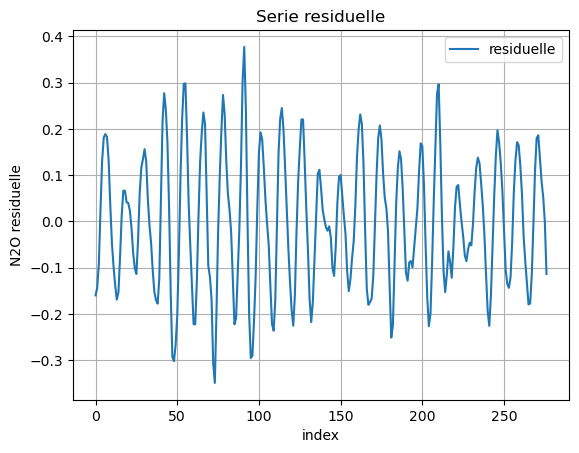

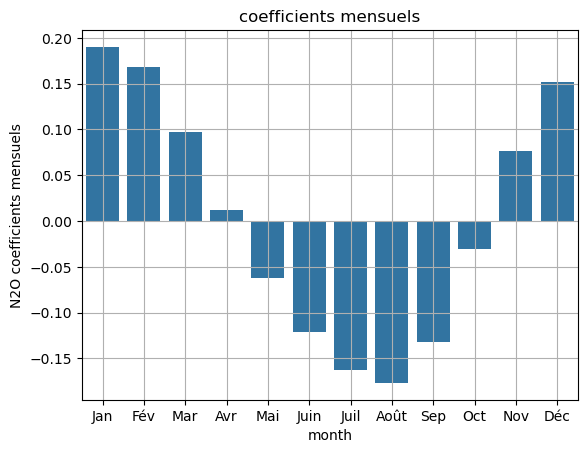

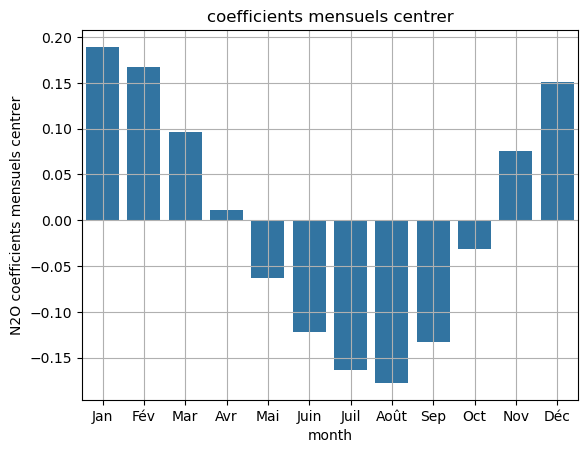

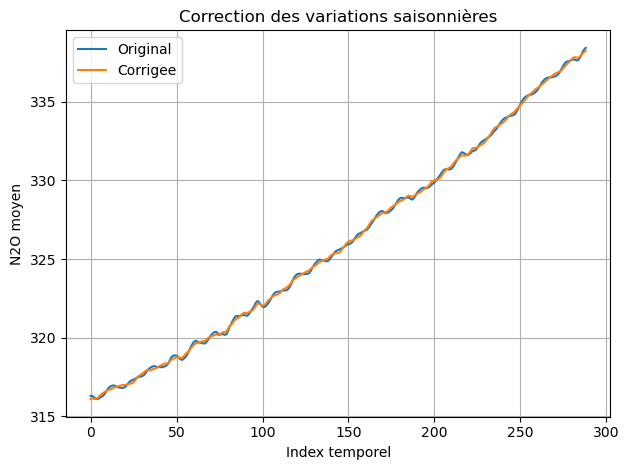

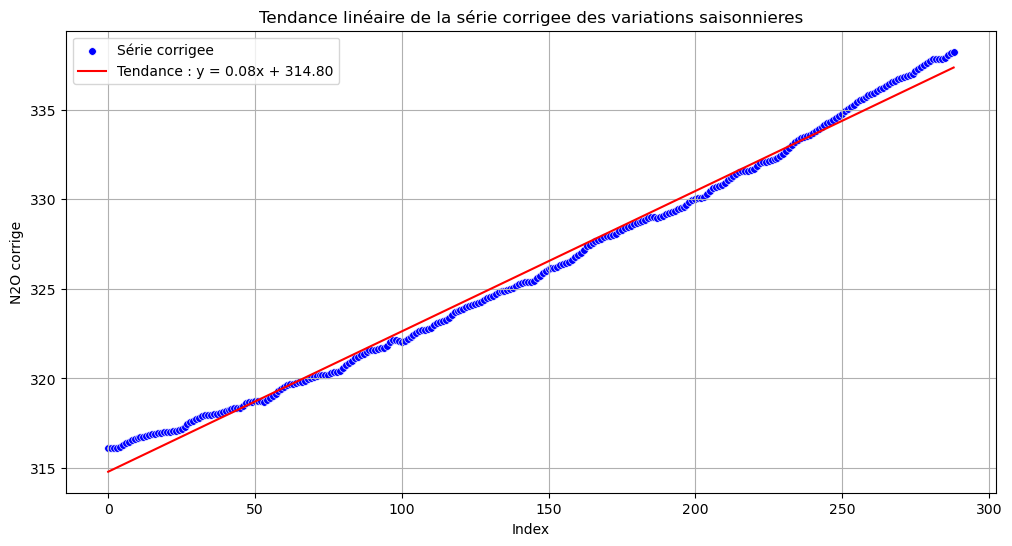

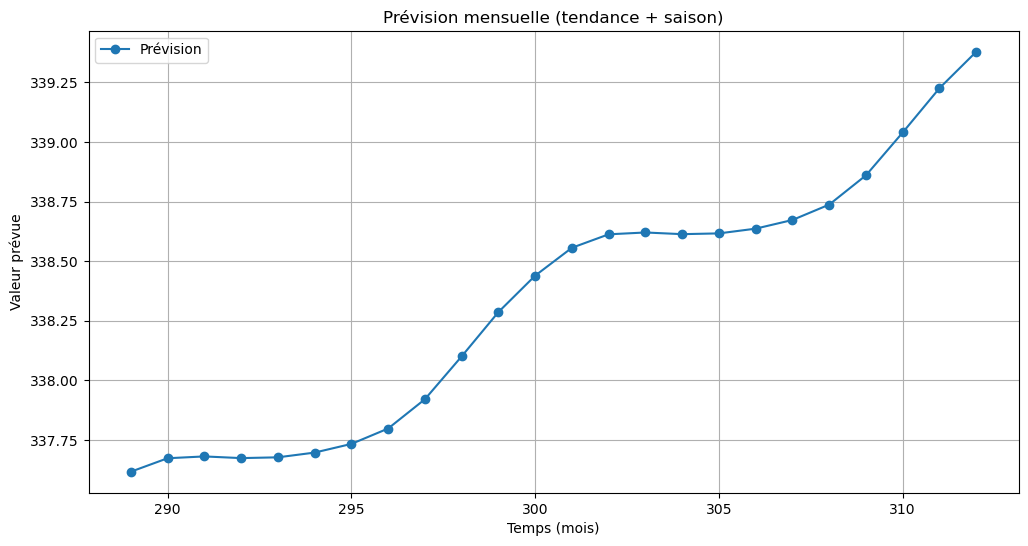

In [24]:
df_smoothed_n2o = moyenne_mobile_ordre_6(df_n2o)
affichage_moyenne_mobile_ordre_6(df_n2o,df_smoothed_sf6,"N2O")

df_residual_n2o = serie_residuelle_vector(df_n2o,df_smoothed_n2o,6)
affichage_serie_residuelle(df_residual_n2o,"N2O")

coefficients_mensuels_n2o = coefficients_mensuels(df_n2o, df_residual_n2o, 6)
affichage_coefficients_mensuels(coefficients_mensuels_n2o,"N2O")

centrer_coefficient_mensuels_n2o = centrer_coefficient_mensuels(coefficients_mensuels_n2o)
affichage_centrer_coefficient_mensuels(centrer_coefficient_mensuels_n2o,"N2O")

correction_n2o = correction_variation_saisoniere(df_n2o,centrer_coefficient_mensuels_n2o)
afficher_correction_variation_saisoniere(correction_n2o,"N2O")

x , y , y_pred , a , b = regression_corrige_moindres_carres(correction_n2o)
affichage_regression_corrige_moindres_carres(x,y,y_pred,a,b,"N2O")

prevision_n2o = prevision(a,b,centrer_coefficient_mensuels_n2o,df_n2o,24)
affichage_prevision(prevision_n2o)

### CO2

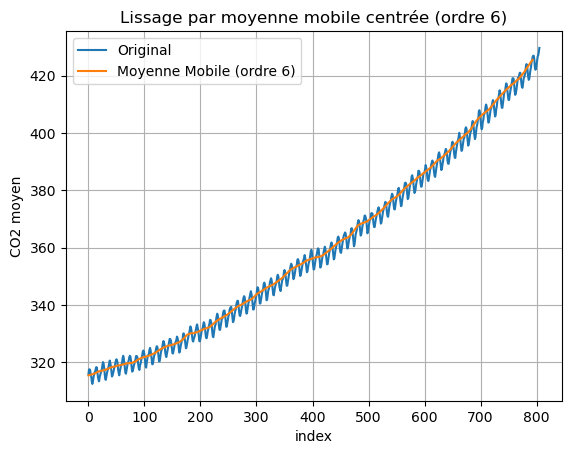

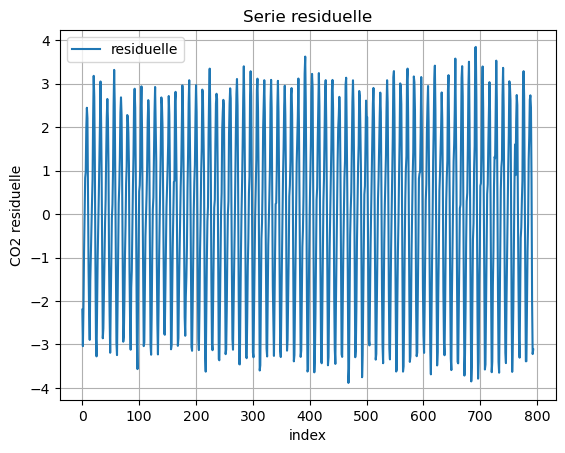

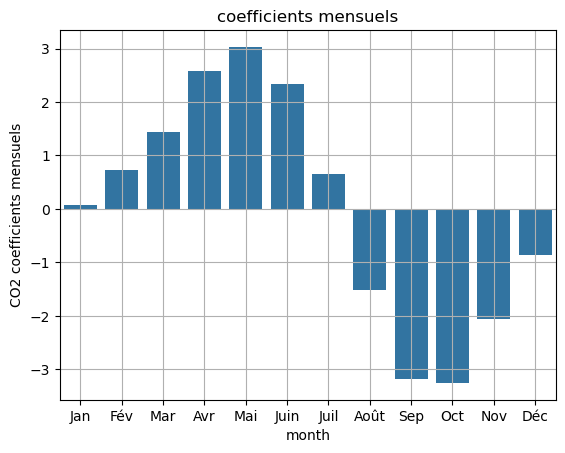

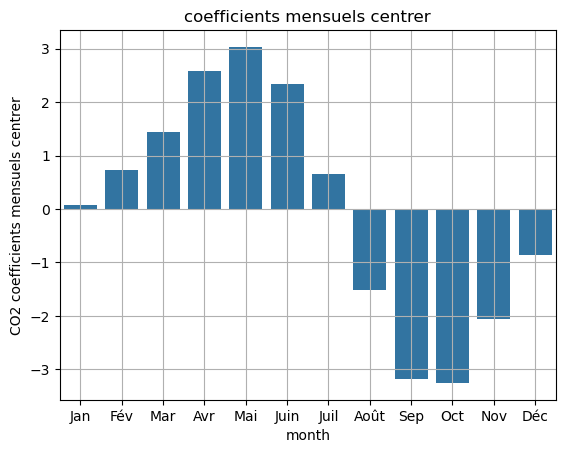

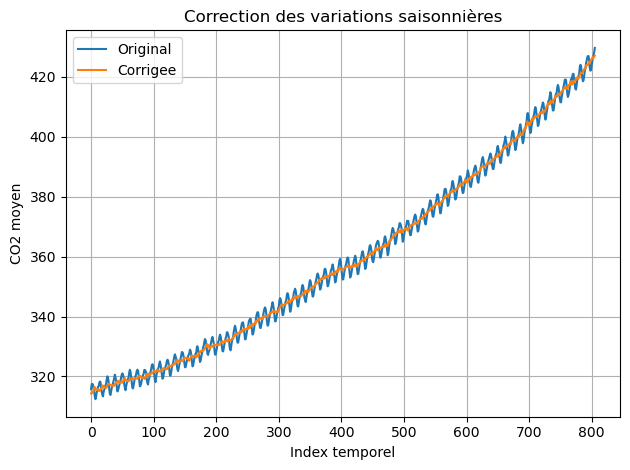

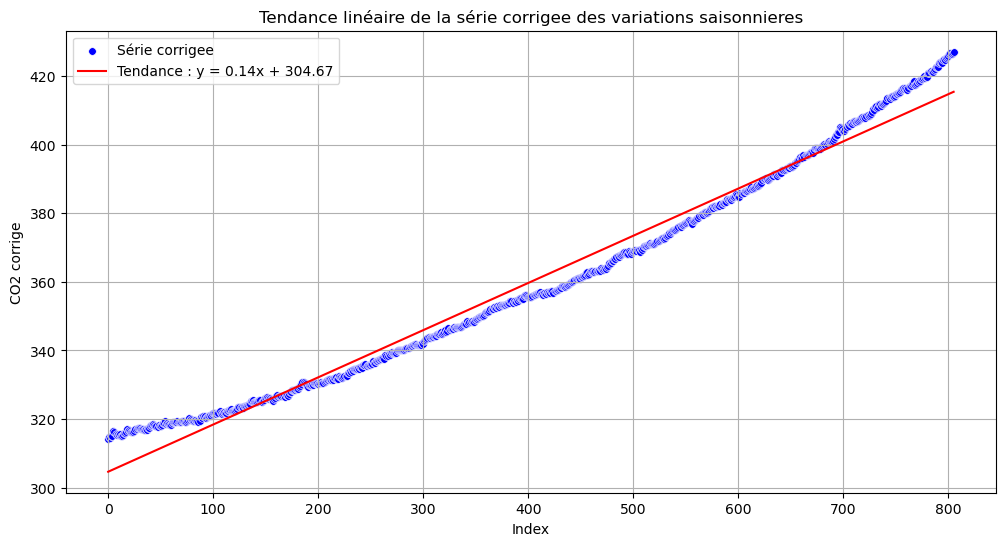

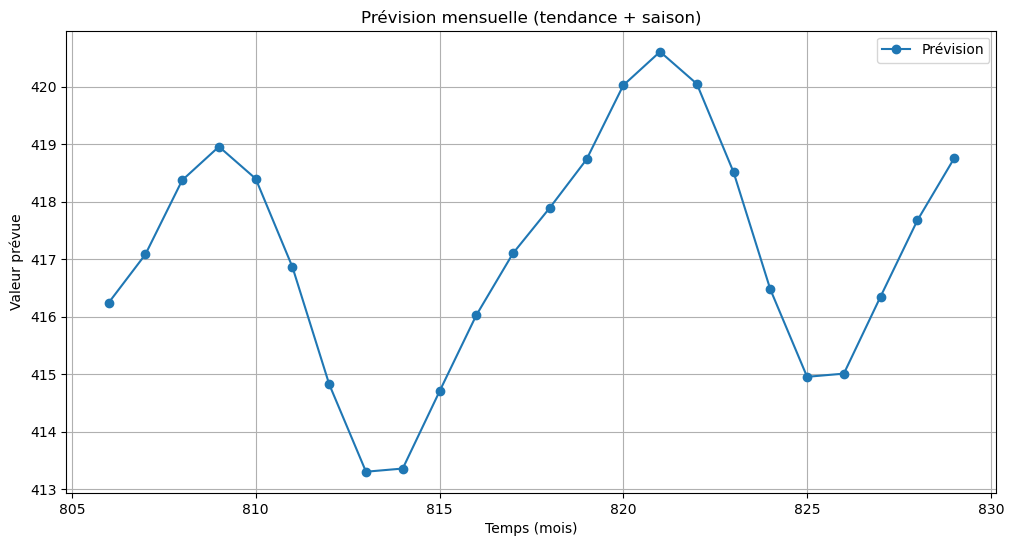

In [25]:
df_smoothed_co2 = moyenne_mobile_ordre_6(df_co2)
affichage_moyenne_mobile_ordre_6(df_co2,df_smoothed_co2,"CO2")

df_residual_co2 = serie_residuelle_vector(df_co2,df_smoothed_co2,6)
affichage_serie_residuelle(df_residual_co2,"CO2")

coefficients_mensuels_co2 = coefficients_mensuels(df_co2, df_residual_co2, 6)
affichage_coefficients_mensuels(coefficients_mensuels_co2,"CO2")

centrer_coefficient_mensuels_co2 = centrer_coefficient_mensuels(coefficients_mensuels_co2)
affichage_centrer_coefficient_mensuels(centrer_coefficient_mensuels_co2,"CO2")

correction_co2 = correction_variation_saisoniere(df_co2,centrer_coefficient_mensuels_co2)
afficher_correction_variation_saisoniere(correction_co2,"CO2")

x , y , y_pred , a , b = regression_corrige_moindres_carres(correction_co2)
affichage_regression_corrige_moindres_carres(x,y,y_pred,a,b,"CO2")

prevision_co2 = prevision(a,b,centrer_coefficient_mensuels_co2,df_co2,24)
affichage_prevision(prevision_co2)

Il n'est pas possible de la faire sur les 6 premieres valeurs et les 6 dernières.

# Question 6

## Fonction

In [26]:
def lisser_serie_multiplicatif(dataframe, periode):
    dataframe_copy = dataframe.copy()
    dataframe_copy["tendance"] = dataframe_copy["average"].rolling(window=periode, center=True).mean()
    return dataframe_copy

In [27]:
def afficher_lisser_serie_multiplicatif(dataframe,y_label):
    plt.figure(figsize=(12, 5))
    plt.plot(dataframe["average"], label="Série originale", alpha=0.6)
    plt.plot(dataframe["tendance"], label="Tendance", color="red", linewidth=2)
    plt.title("Lissage par moyenne mobile")
    plt.legend()
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

In [28]:
def composante_saisonniere_multiplicative(dataframe):
    dataframe["saison_multiplicative"] = dataframe["average"] / dataframe["tendance"]
    return dataframe

In [29]:
def afficher_saison_multiplicative(dataframe, label_serie="Serie"):
    if "saison_multiplicative" not in dataframe.columns:
        raise ValueError("La colonne 'saison_multiplicative' est absente du DataFrame. Appliquer 'composante_saisonniere_multiplicative' d'abord.")

    plt.figure(figsize=(14, 6))
    sns.lineplot(data=dataframe["saison_multiplicative"], label="Composante saisonnière multiplicative")
    plt.axhline(y=1, color="red", linestyle="--", linewidth=1.5, label="Référence")
    plt.title(f"Composante saisonnière multiplicative — {label_serie}")
    plt.xlabel("Temps (index)")
    plt.ylabel("Saison multiplicative (St)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [30]:
def calculer_coefficient_mensuel_multiplicatif(dataframe):
    coef_mensuels = dataframe.groupby("month")["saison_multiplicative"].mean()
    coef_mensuels_normalises = coef_mensuels / coef_mensuels.mean()
    return coef_mensuels_normalises

In [31]:
def corriger_coefficients_mensuels_multiplicatifs(coeficients):
    moyenne = coeficients.mean()
    coeficients_corriges = coeficients / moyenne
    return coeficients_corriges

In [32]:
def affichage_coefficients_mensuels_corige_6(serie_coefficient, y_label):
    dataframe_coeficient = serie_coefficient.reset_index()
    dataframe_coeficient.columns = ['month', 'coefficient_corrige']
    dataframe_coeficient['month'] = pd.to_numeric(dataframe_coeficient['month'], errors='coerce')
    dataframe_coeficient["hue"] = dataframe_coeficient["month"]
    plt.figure(figsize=(10, 5))
    sns.barplot(data=dataframe_coeficient, x="month", y="coefficient_corrige", hue="hue", palette="coolwarm", dodge=False, legend=False)
    plt.axhline(y=1.0, color='black', linestyle='--', linewidth=1, label="Moyenne ")
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.title("Coefficients mensuels corrigés (multiplicatif)")
    plt.xlabel("Mois")
    plt.ylabel(y_label)
    plt.xticks(
        ticks=range(0, 12),
        labels=['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']
    )
    plt.tight_layout()
    plt.show()

In [33]:
def corriger_variation_saisonniere(dataframe, coefficients_corriges):
    dataframe_corrigee = dataframe.copy()
    dataframe_corrigee["coefficient_corrige"] = dataframe_corrigee["month"].map(coefficients_corriges)
    dataframe_corrigee["corrige"] = dataframe_corrigee["average"] / dataframe_corrigee["coefficient_corrige"]
    return dataframe_corrigee

In [34]:
def afficher_serie_corrigee(dataframe_corrigee):
    plt.figure(figsize=(12, 6))
    plt.plot(dataframe_corrigee.index, dataframe_corrigee["average"], label="Série initiale", color="blue", linestyle="--")
    plt.plot(dataframe_corrigee.index, dataframe_corrigee["corrige"], label="Série désaisonnalisée", color="red")
    plt.title("Série corrigée des variations saisonnières")
    plt.xlabel("Temps (index)")
    plt.ylabel("Valeur")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [35]:
def ajouter_tendance(dataframe):
    dataframe = dataframe.reset_index(drop=True).copy()
    x = dataframe.index.to_numpy()
    y = dataframe["corrige"].to_numpy()

    x_mean = np.mean(x)
    y_mean = np.mean(y)
    a = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    b = y_mean - a * x_mean

    dataframe["tendance"] = a * x + b
    return dataframe, a, b

In [36]:
def regression_tendance(dataframe):
    df = dataframe.dropna(subset=["tendance"]).copy()
    t = df.index.to_numpy()
    y = df["tendance"].to_numpy()
    a, b = np.polyfit(t, y, deg=1)
    return a, b

In [46]:
def prevision_multiplicatif(dataframe, a, b, coeficient_mensuels, nb_mois):
    previsions = []
    x_last = len(dataframe) - 1
    for i in range(1, nb_mois + 1):
        mois_futur = (x_last + i) % 12 or 12
        t = x_last + i
        tendance = a * t + b
        saison = coeficient_mensuels[mois_futur]
        prevision = tendance + saison
        previsions.append((t, mois_futur, prevision))
    return previsions


In [38]:
def affichage_prevision_multiplicatif(previsions):
    df_prev = pd.DataFrame(previsions, columns=["Index", "Mois", "Prévision"])
    if not pd.api.types.is_numeric_dtype(df_prev["Prévision"]):
        raise TypeError("La colonne 'Prévision' contient des objets non numériques.")
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_prev["Index"], df_prev["Prévision"], marker='o', label="Prévision")
    plt.title("Prévision mensuelle (tendance × saison)")
    plt.xlabel("Temps (mois)")
    plt.ylabel("Valeur prévue")
    plt.grid(True)
    plt.legend()
    plt.show()


## CH4

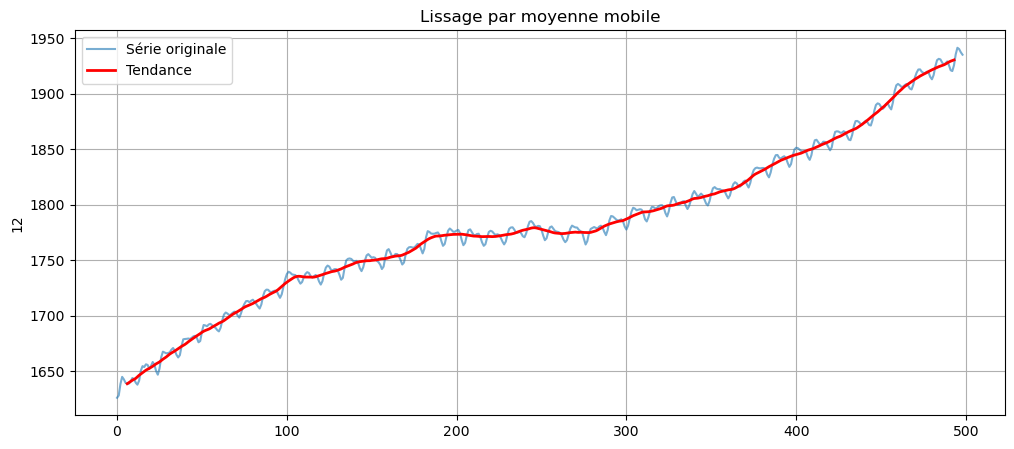

,month,average,tendance
0,7,1625.96,NaN
1,8,1628.05,NaN
2,9,1638.42,NaN
3,10,1644.81,NaN
4,11,1642.60,NaN
...,...,...,...
494,9,1935.67,NaN
495,10,1941.58,NaN
496,11,1940.44,NaN
497,12,1937.52,NaN


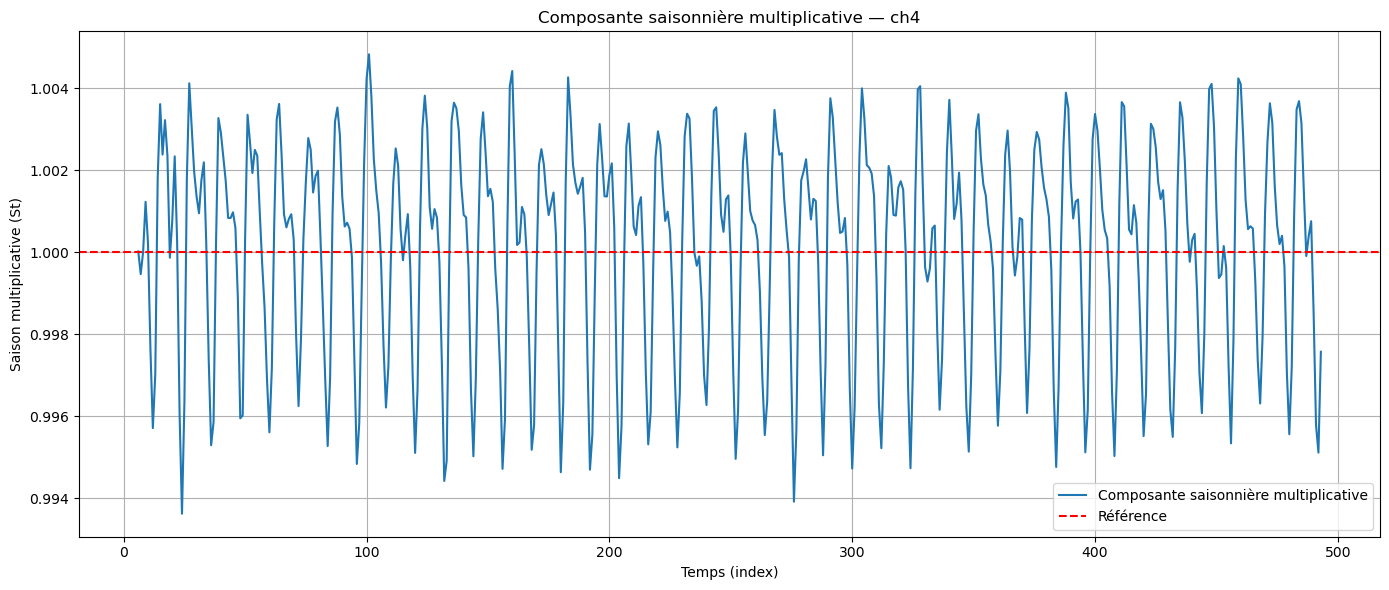

,month,average,tendance,saison_multiplicative
0,7,1625.96,NaN,NaN
1,8,1628.05,NaN,NaN
2,9,1638.42,NaN,NaN
3,10,1644.81,NaN,NaN
4,11,1642.60,NaN,NaN
...,...,...,...,...
494,9,1935.67,NaN,NaN
495,10,1941.58,NaN,NaN
496,11,1940.44,NaN,NaN
497,12,1937.52,NaN,NaN


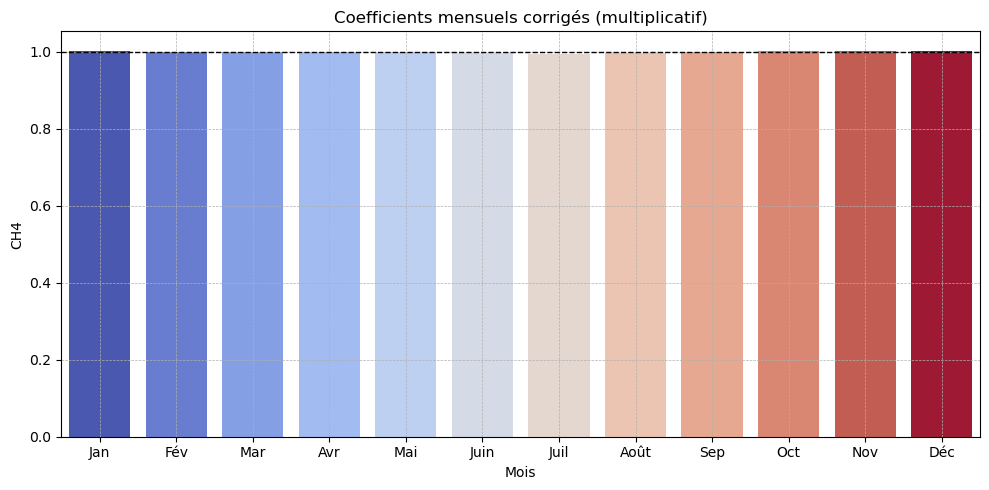

month
1     1.001213
2     1.000632
3     1.000762
4     1.000695
5     0.999456
6     0.996950
7     0.995088
8     0.996584
9     1.000316
10    1.002775
11    1.003135
12    1.002395
Name: saison_multiplicative, dtype: float64

'caca'

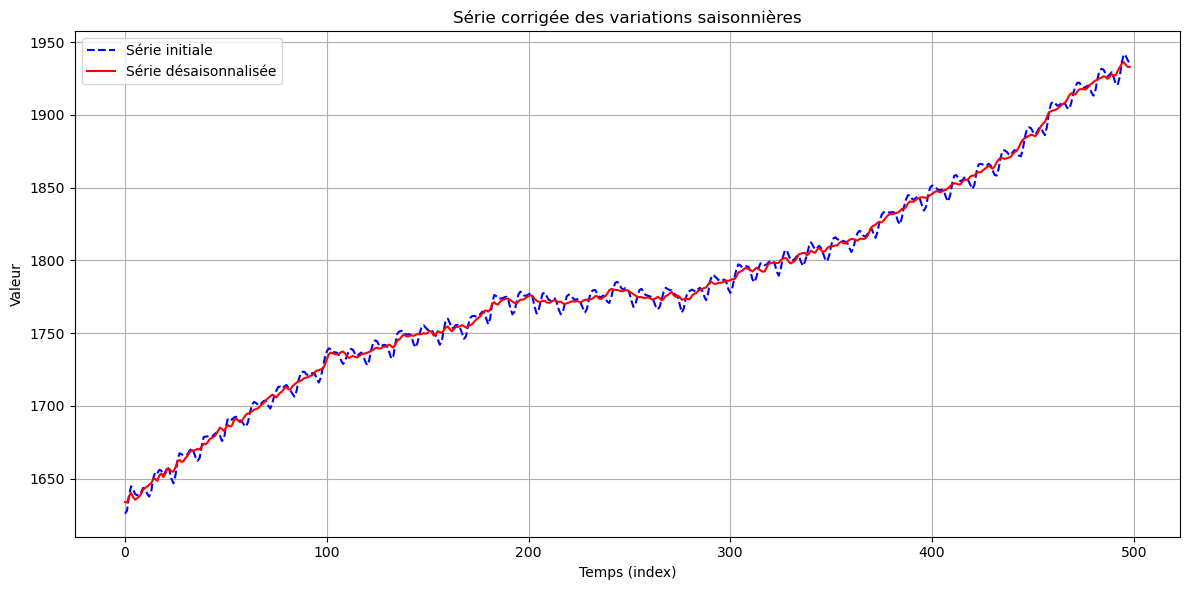

,month,average,coefficient_corrige,corrige
0,7,1625.96,0.995088,1633.986811
1,8,1628.05,0.996584,1633.631029
2,9,1638.42,1.000316,1637.901793
3,10,1644.81,1.002775,1640.257499
4,11,1642.60,1.003135,1637.467035
...,...,...,...,...
494,9,1935.67,1.000316,1935.057778
495,10,1941.58,1.002775,1936.206099
496,11,1940.44,1.003135,1934.376314
497,12,1937.52,1.002395,1932.890345


KeyError: 7

In [48]:
lisser_ch4 = lisser_serie_multiplicatif(df_ch4,12)
afficher_lisser_serie_multiplicatif(lisser_ch4,12)
display(lisser_ch4)

multiplicative_ch4 = composante_saisonniere_multiplicative(lisser_ch4)
afficher_saison_multiplicative(multiplicative_ch4,"ch4")
display(multiplicative_ch4)

coefficient_mensuel_multiplicatif_ch4 = calculer_coefficient_mensuel_multiplicatif(multiplicative_ch4)
affichage_coefficients_mensuels_corige_6(coefficient_mensuel_multiplicatif_ch4,"CH4")
display(coefficient_mensuel_multiplicatif_ch4)
display("caca")

corrige_ch4 = corriger_variation_saisonniere(df_ch4,coefficient_mensuel_multiplicatif_ch4)
afficher_serie_corrigee(corrige_ch4)
display(corrige_ch4)

corrige_ch4, a, b = ajouter_tendance(corrige_ch4)




prevision_multiplicative_ch4 = prevision_multiplicatif(df_ch4,a,b,corrige_ch4,24)
display(prevision_multiplicative_ch4)











## SF6

## N2O

## CO2